In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('data/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.duplicated().any()

np.False_

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
m = titanic['Age'].mean()
titanic['Age'].fillna(m, inplace=True)

C:\Users\ntd20\AppData\Local\Temp\ipykernel_13948\1929097717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(m, inplace=True)


## EDA

In [7]:
# PT 1 biến: biến phân loại: Pclass
titanic['Pclass'].unique()

array([3, 1, 2])

In [8]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

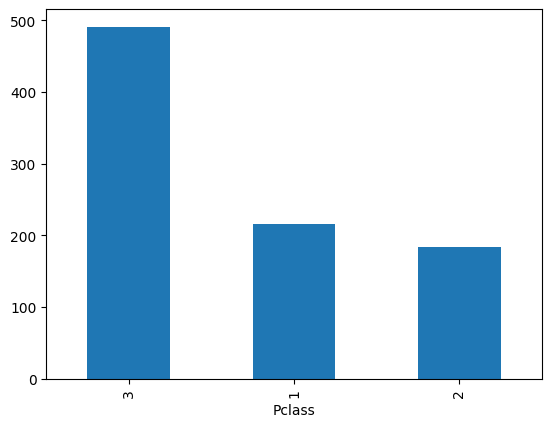

In [9]:
titanic['Pclass'].value_counts().plot.bar()
plt.show()

In [10]:
titanic['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

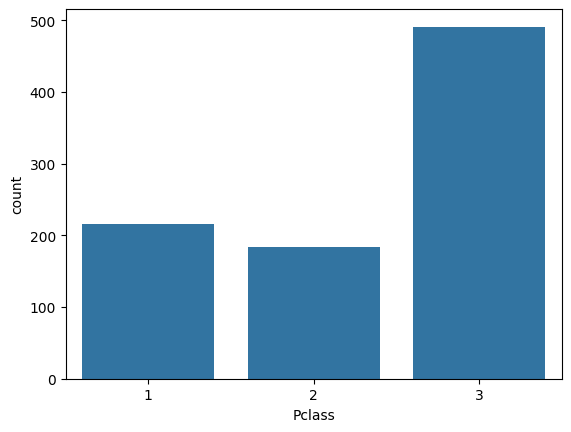

In [11]:
sns.countplot(data=titanic, x='Pclass')
plt.show()

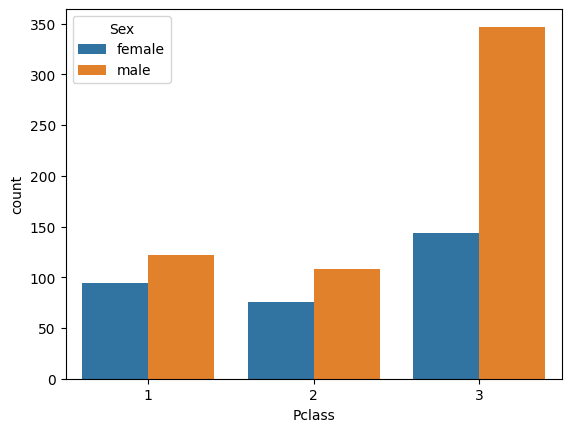

In [12]:
sns.countplot(data=titanic, x='Pclass', hue='Sex')
plt.show()

In [13]:
titanic.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [14]:
titanic['Pclass'].dtype

dtype('int64')

In [15]:
titanic['Pclass'] = titanic['Pclass'].astype('category')

In [16]:
titanic['Pclass'].describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

In [17]:
titanic['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [18]:
# PT 1 biến: biến số liên tục: biến Age
titanic['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# có 25% hành khách có tuổi <= 22
# có 75% hành khách có tuổi >= 22

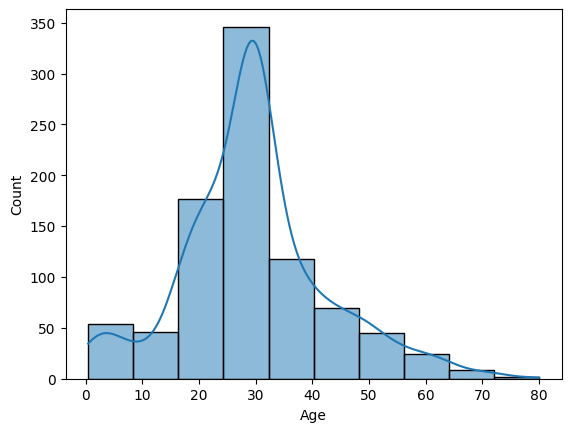

In [20]:
sns.histplot(data=titanic, x='Age', bins=10, kde=True)
plt.show()

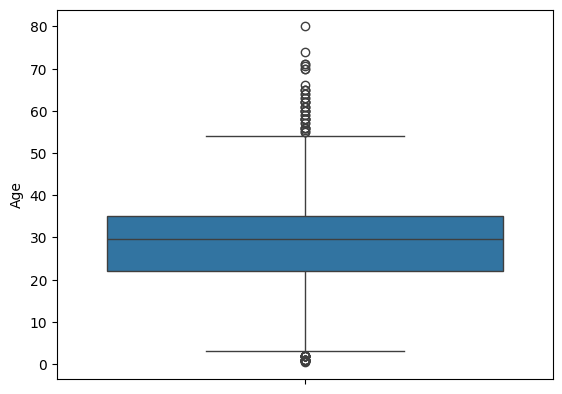

In [21]:
sns.boxplot(data=titanic, y='Age')
plt.show()

In [22]:
# PT biến số liên tục: Fare
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

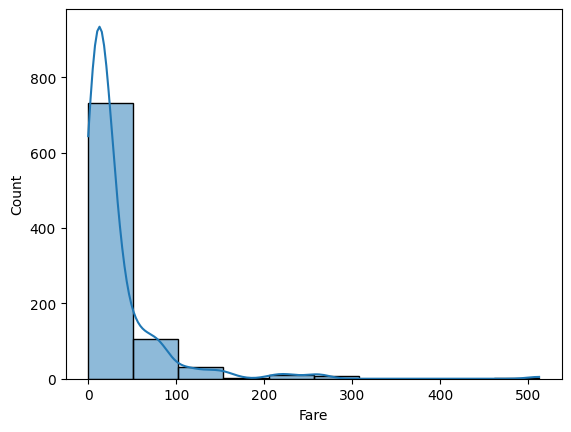

In [23]:
sns.histplot(data=titanic, x='Fare', bins=10, kde=True)
plt.show()

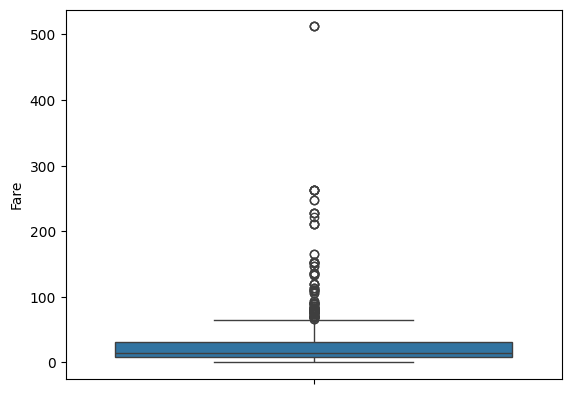

In [24]:
sns.boxplot(data=titanic, y='Fare')
plt.show()

In [25]:
# biến Parch (kiểu int)
titanic['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [26]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [27]:
titanic['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

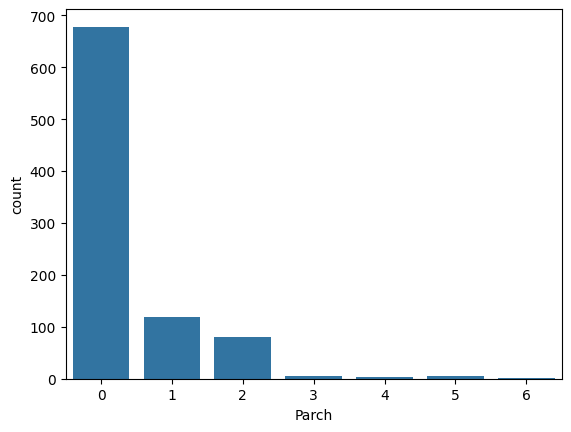

In [28]:
sns.countplot(data=titanic, x='Parch')
plt.show()

In [29]:
# biến định tính (chuỗi)
titanic.select_dtypes(['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [30]:
# biến định lượng (biến số)
titanic.select_dtypes(['number']).columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [31]:
# PT 2 biến: biến số liên tục và biến số liên tục: biến Fare và biến Age
titanic[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.091566
Age,0.091566,1.000000


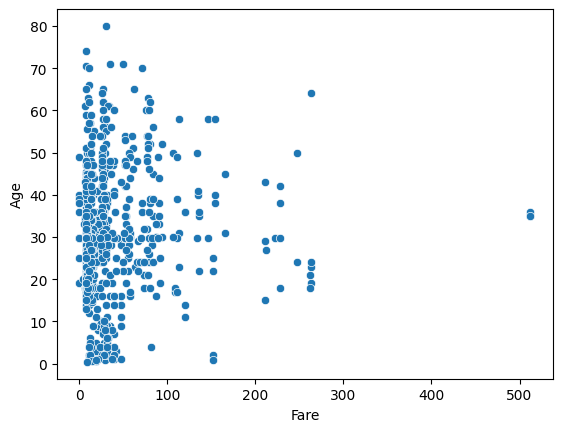

In [32]:
sns.scatterplot(data=titanic, x='Fare', y='Age')
plt.show()

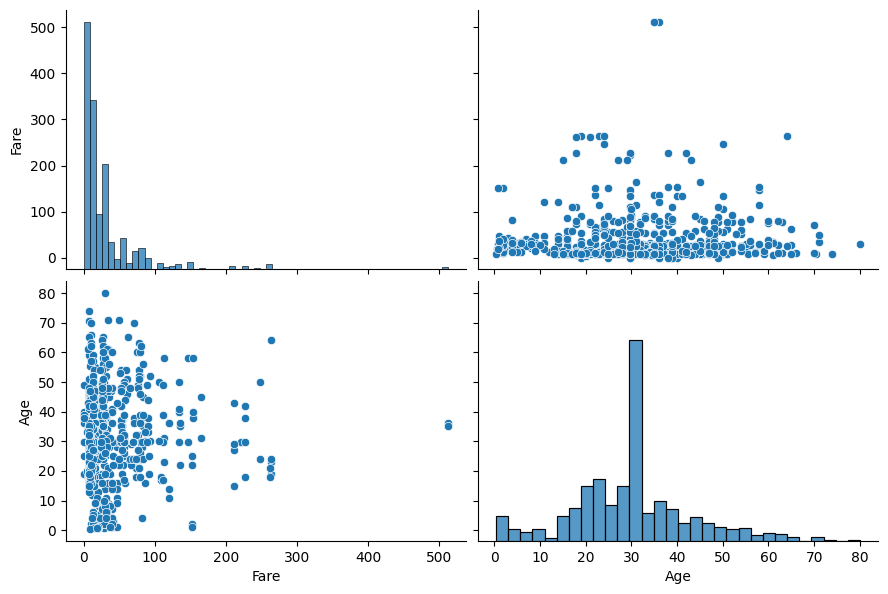

In [33]:
sns.pairplot(titanic[['Fare','Age']], aspect=1.5, height=3.0)
plt.show()

In [34]:
# PT 2 biến: biến phân loại và biến phân loại: biến Pclass và biến Sex
table = pd.crosstab(titanic['Pclass'], titanic['Sex'])
table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


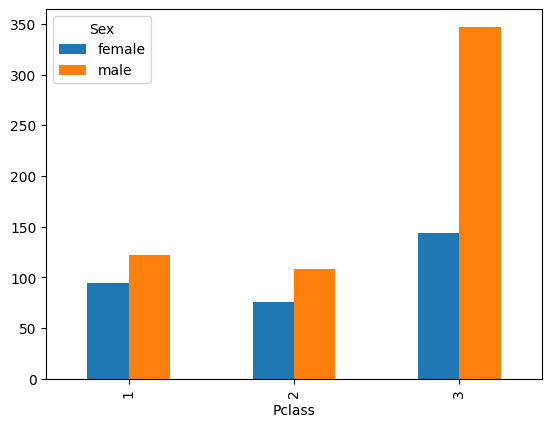

In [35]:
table.plot.bar()
plt.show()

In [36]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [37]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], normalize=True)

Sex,female,male
Pclass,,
1,0.105499,0.136925
2,0.085297,0.121212
3,0.161616,0.389450


In [38]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], aggfunc='mean', values=titanic['Age'])

Sex,female,male
Pclass,,
1,34.141405,39.287717
2,28.748661,30.653908
3,24.068493,27.372153


In [39]:
titanic.groupby('Pclass')['Age'].mean()

C:\Users\ntd20\AppData\Local\Temp\ipykernel_13948\2875000872.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('Pclass')['Age'].mean()


Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [40]:
# thực hiện kiểm định Chi-squared
# H0: biến Pclass và biến Sex là hai biến độc lập
# Ha: biến Pclass và biến Sex là hai biến phụ thuộc

In [41]:
from scipy.stats import chi2_contingency

In [42]:
table = pd.crosstab(titanic['Pclass'], titanic['Sex'])
table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [43]:
stat, p, dof, expected = chi2_contingency(table)

In [44]:
print(p)

0.00020638864348233114


In [45]:
if p<0.05:
    print('Bác bỏ H0 --> chấp nhận Ha --> biến Pclass và biến Sex là hai biến phụ thuộc')
else:
    print('Bác bỏ Ha --> chấp nhận H0 --> biến Pclass và biến Sex là hai biến độc lập')

Bác bỏ H0 --> chấp nhận Ha --> biến Pclass và biến Sex là hai biến phụ thuộc


In [46]:
# kiểm định chi-squared cho hai biến phân loại: biến Pclass và Survived
# H0: biến Pclass và biến Survived là hai biến độc lập
# Ha: biến Pclass và biến Survived là hai biến phụ thuộc

In [47]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [48]:
stat, p, dof, expected = chi2_contingency(table)

In [49]:
print(p)

4.549251711298793e-23


In [50]:
if p<0.05:
    print('Bác bỏ H0 --> chấp nhận Ha --> biến Pclass và biến Survived là hai biến phụ thuộc')
else:
    print('Bác bỏ Ha --> chấp nhận H0 --> biến Pclass và biến Survived là hai biến độc lập')

Bác bỏ H0 --> chấp nhận Ha --> biến Pclass và biến Survived là hai biến phụ thuộc


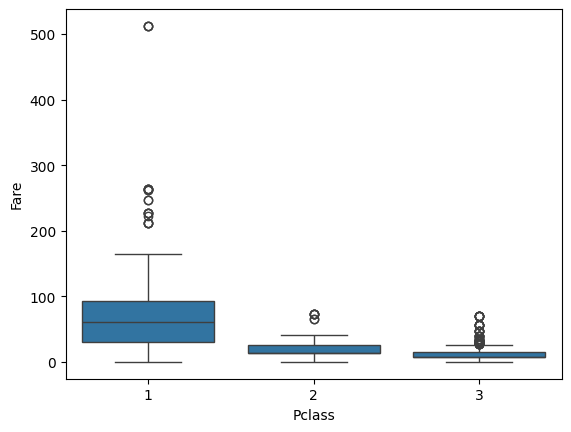

In [51]:
# PT 2 biến: biến phân loại và biến số liên tục
# biến Pclass có ảnh hưởng đến biến Fare?
sns.boxplot(data=titanic, x='Pclass', y='Fare')
plt.show()

In [52]:
titanic.groupby('Pclass')['Fare'].mean()

C:\Users\ntd20\AppData\Local\Temp\ipykernel_13948\2338753062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('Pclass')['Fare'].mean()


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

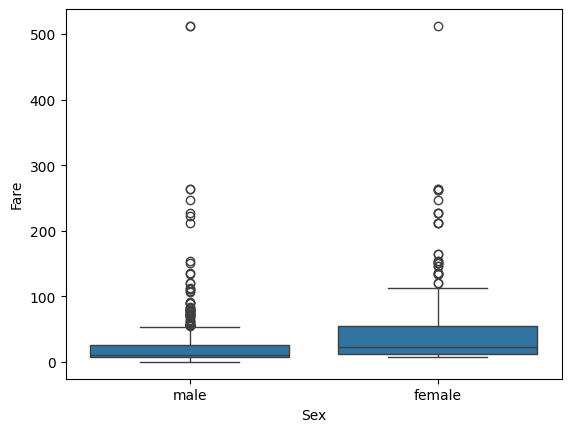

In [53]:
# biến Sex có ảnh hưởng đến biến Fare?
sns.boxplot(data=titanic, x='Sex', y='Fare')
plt.show()

In [54]:
titanic.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
# H0: Không có sự khác biệt ý nghĩa thống kê về mức trung bình giá vé giữa các lớp hành khách
# Ha: Có sự khác biệt ý nghĩa thống kê về mức trung bình giá vé giữa các lớp hành khách

In [57]:
# Tạo mô hình ANOVA
formula = 'Fare ~ C(Pclass)'
model = ols(formula, data=titanic).fit()

In [58]:
# Thực hiện phân tích ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Pclass),7.760301e+05,2.0,242.344157,1.031376e-84
Residual,1.421769e+06,888.0,NaN,NaN


In [59]:
# Kiểm tra kết quả
alpha = 0.05
if 1.031376e-84 < alpha: # bác bỏ H0
    print("Có sự khác biệt ý nghĩa thống kê về mức giá vé giữa các lớp hành khách.")
else: # chấp nhận H0
    print("Không có sự khác biệt ý nghĩa thống kê về mức giá vé giữa các lớp hành khách.")

Có sự khác biệt ý nghĩa thống kê về mức giá vé giữa các lớp hành khách.


In [60]:
# H0: Không có sự khác biệt ý nghĩa thống kê về mức trung bình giá vé giữa các giới tính (Sex)
# Ha: Có sự khác biệt ý nghĩa thống kê về mức trung bình giá vé giữa các giới tinh

In [61]:
# Tạo mô hình ANOVA
formula = 'Fare ~ C(Sex)'
model = ols(formula, data=titanic).fit()
# Thực hiện phân tích ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Sex),7.306640e+04,1.0,30.571392,4.230868e-08
Residual,2.124732e+06,889.0,NaN,NaN


In [62]:
if 4.230868e-08 < alpha: # bác bỏ H0
    print("Có sự khác biệt ý nghĩa thống kê về mức giá vé giữa các giới tính.")
else: # chấp nhận H0
    print("Không có sự khác biệt ý nghĩa thống kê về mức giá vé giữa các giới tính.")

Có sự khác biệt ý nghĩa thống kê về mức giá vé giữa các giới tính.


In [63]:
# biến liên tục: Fare
# các biến phân loại: Pclass và Sex
# Tạo mô hình ANOVA
formula = 'Fare ~ C(Pclass) + C(Sex) + C(Pclass):C(Sex)'
model = ols(formula, data=titanic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Pclass),7.347122e+05,2.0,242.620968,9.763645e-85
C(Sex),3.174857e+04,1.0,20.968394,5.337586e-06
C(Pclass):C(Sex),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


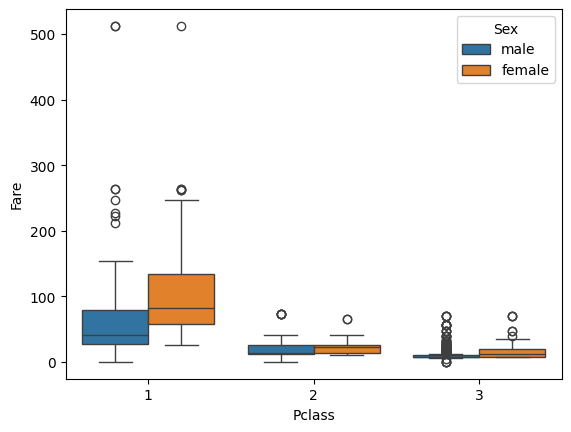

In [64]:
sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Sex')
plt.show()